# **Problem Statement**

**Insurance company** seeking to build a **predictive model** to determine whether a **policyholder (customer)** will pay the next premium on time or not.

---

Building this model is critical for the company because it enables them to:
- **Identify high-risk customers** who are less likely to pay premiums on time.
- **Optimize their communication strategy** by proactively reaching out to these customers with reminders or personalized offers.
- **Reduce policy lapses** by encouraging timely payments.

---

To achieve this, the model will utilize:
- **Past premium payment history** of policyholders.
- **Demographic information:**
    - `age`, `monthly income`, and `residence area type`.
- **Sourcing channel** information, which represents the channel through which the customer was acquired.

---

By leveraging this data, the model aims to:
- **Accurately predict** whether the customer will make the next premium payment on time.
- Help the company **enhance customer retention** and **improve financial stability**.


# **Hypothesis Generation**

**Hypothesis generation** is the process of making **assumptions or educated guesses** about the factors that could influence the **target variable** (`premium payment behavior`) in the dataset.

---

### **Hypotheses Based on the Dataset**

### **Customer Demographics**
- **H1:** Customers with **higher income** are **more likely** to pay premiums on time.
- **H2:** Customers from **urban areas** have a **higher likelihood** of timely payments compared to rural customers due to better financial access.

---

### **Payment History and Premium Behavior**
- **H3:** Customers with **fewer late payments** in the past are **more likely** to pay premiums on time.
- **H4:** Customers with a **higher number of on-time premium payments** are **more reliable** payers.
- **H5:** Customers who paid a **higher percentage of premiums by cash/credit** have a **better payment history** and are more likely to pay on time.

---

### **Sourcing Channel Influence**
- **H6:** Customers acquired through **certain sourcing channels** may have a **higher risk of non-payment**, depending on the channel's reliability.

---

### **Application Underwriting Score**
- **H7:** Customers with a **higher underwriting score** are **more likely** to pay premiums on time.
- **H8:** Customers with a **low underwriting score** have a **higher risk of default**.

---

### **Potential Outlier and Anomaly Hypotheses**
- **H9:** Customers with **extremely high income** may represent **anomalous or fraudulent data points**, potentially skewing the model.
- **H10:** Extremely **late payers** (more than 12 months late) are **unlikely** to pay future premiums.

---

- **Test the hypotheses** during the **EDA (Exploratory Data Analysis)**.
- **Visualize relationships** using scatter plots, boxplots, and correlation matrices.
- Use **statistical tests** (e.g., chi-square, t-test) to valate the hypotheses.


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns             # For data visualization
import matplotlib.pyplot as plt   # For plotting graphs
%matplotlib inline

import os
import warnings                   # To ignore any warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler, MinMaxScaler   #standard scaler

# Evaluation metrics
from sklearn.metrics import confusion_matrix  #evaluation metrics
from sklearn.metrics import classification_report

#MODEL BUILDING
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

#parameter improving
from sklearn.model_selection import GridSearchCV

import pickle

# **Data Exploration**

**Data Exploration** is the process of analyzing and understanding the dataset before applying machine learning models. It helps in identifying patterns, detecting anomalies, and preparing the data for modeling.

---

### **Stages of Data Exploration**

1. **Reading the Data:**  
    - Import the dataset and load it into a **DataFrame**.  
    - Check the **shape**, **data types**, and **basic info**.  
    - Display the first few rows to verify the data.  

2. **Variable Identification:**  
    - Categorize variables into:  
        - **Continuous variables** (e.g., `age_in_days`, `Income`)  
        - **Categorical variables** (e.g., `sourcing_channel`, `residence_area_type`)  
    - Identify **target and independent variables**.

3. **Missing Value Treatment:**  
    - Identify missing values using:  
        - `isnull()` or `info()` in pandas.  
    - Handle missing values by:  
        - **Imputation Strategies:**  
            - **Continuous variables:** Mean/Median imputation.  
            - **Categorical variables:** Mode imputation or label "Unknown".  
        - **Advanced Techniques:**  
            - KNN or Regression imputation.  

4. **Univariate Analysis:**  
    - Analyze each variable **independently**.  
    - Use:  
        - **Descriptive statistics:** Mean, median, mode, standard deviation.  
        - **Visualizations:** Histograms, boxplots, and density plots.  
    - Identify:  
        - **Distribution type** (symmetric, skewed).  
        - **Presence of outliers**.

5. **Outlier Detection and Treatment:**  
    - Detect **outliers** using:  
        - **Boxplots**  
        - **IQR method**  
        - **Z-score method**  
    - Handle outliers by:  
        - **Capping or flooring** extreme values.  
        - **Removing or transforming** them.  

6. **Bivariate Analysis:**  
    - Analyze the **relationship between two variables**:  
        - **Continuous vs Continuous:** Correlation plot, scatter plot.  
        - **Continuous vs Categorical:** Boxplot, violin plot.  
        - **Categorical vs Categorical:** Stacked bar plot or heatmap.  

7. **Variable Transformation:**  
    - **Transform skewed variables** using:  
        - **Logarithmic or square root transformation**.  
    - **Scale the data** using:  
        - **Standardization or normalization**.  
    - **Encode categorical variables** using:  
        - **One-hot encoding** or **label encoding**.

---

- **Missing value treatment** is performed before univariate analysis to avoid distortion in statistics.  
- **Outlier detection** is done before bivariate analysis to prevent skewed relationships.  
- **Variable transformation** is performed at the end to ensure data is properly prepared.  

---

In [2]:
# loading the data
data = pd.read_csv(r'/content/premium_dataset.csv')
df=data

| **Variable**                         | **Definition**                                  |
|-------------------------------------|------------------------------------------------|
| `id`                                 | Unique ID of the policy                         |
| `perc_premium_paid_by_cash_credit`   | Percentage of premium amount paid by cash or credit card |
| `age_in_days`                        | Age in days of the policyholder                  |
| `Income`                             | Monthly income of the policyholder               |
| `Count_3-6_months_late`              | No. of premiums late by 3 to 6 months           |
| `Count_6-12_months_late`             | No. of premiums late by 6 to 12 months          |
| `Count_more_than_12_months_late`     | No. of premiums late by more than 12 months     |
| `application_underwriting_score`     | Underwriting score of the applicant at the time of application (kind of risk score) |
| `no_of_premiums_paid`                | Total premiums paid on time till now            |
| `sourcing_channel`                   | Sourcing channel for application                |
| `residence_area_type`                | Area type of residence (Urban/Rural)            |
| `target`                             | Target variable:
                                       - `1` → Premium paid on time
                                       - `0` → Otherwise

In [3]:
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13.0,C,Urban,1.0
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21.0,A,Urban,1.0
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7.0,C,Rural,0.0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9.0,A,Urban,1.0
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12.0,B,Urban,1.0


In [4]:
df = df.drop("id", axis=1)

In [5]:
df.columns

Index(['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [6]:
df.shape

(63652, 11)

In [7]:
df.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13.0,C,Urban,1.0
1,0.010,21546,315150,0.0,0.0,0.0,99.89,21.0,A,Urban,1.0
2,0.917,17531,84140,2.0,3.0,1.0,98.69,7.0,C,Rural,0.0
3,0.049,15341,250510,0.0,0.0,0.0,99.57,9.0,A,Urban,1.0
4,0.052,31400,198680,0.0,0.0,0.0,99.87,12.0,B,Urban,1.0


# **VARIABLE IDENTIFICATION**

In [8]:
# Print data types for each variable
df.dtypes

,0
perc_premium_paid_by_cash_credit,float64
age_in_days,int64
Income,int64
Count_3-6_months_late,float64
Count_6-12_months_late,float64
Count_more_than_12_months_late,float64
application_underwriting_score,float64
no_of_premiums_paid,float64
sourcing_channel,object
residence_area_type,object


There are two format of data types:

1. **object**: Object format means variables are categorical.

2. **int64 / float64**: It represents the integer / float variables.

In [9]:
# Identify categorical and continuous variables
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
continuous_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the variables
print("Categorical Variables:")
print(categorical_vars)

print("\nContinuous Variables:")
print(continuous_vars)


Categorical Variables:
['sourcing_channel', 'residence_area_type']

Continuous Variables:
['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'target']


In [10]:
# Print categories for each categorical variable
print("Categories for Categorical Variables:\n")
for col in categorical_vars:
    print(f"{col}:")
    print(df[col].unique())
    print("-" * 50)


Categories for Categorical Variables:

sourcing_channel:
['C' 'A' 'B' 'D' 'E' nan]
--------------------------------------------------
residence_area_type:
['Urban' 'Rural' nan]
--------------------------------------------------


# **Missing Value Investigation**


Missing or empty values in a dataset occur due to:
- **Errors in data collection:**  
    - Incomplete or faulty data entry.  
- **Errors during data reading:**  
    - Issues in file handling or formatting.  
- **Intentional non-disclosure:**  
    - Sensitive information (e.g., income) may be intentionally left blank by customers.

---

- Since the dataset contains **`Income`**, there may be cases where:
    - Some customers might **choose not to disclose** their actual income.  
    - This could lead to **missing values** or incorrect entries (e.g., `0` or `NaN`).  

---

### **Impact of Missing Values**
- **Data Quality Issues:**  
    - Missing values can distort **statistical analysis** and **model accuracy**.  
- **Potential Bias:**  
    - If missing values are not handled properly, it can introduce **bias** in the model.
- **Reduced Model Performance:**  
    - Models with missing values may fail or produce inaccurate predictions.

---

### **Handling Missing Values**
1. **Detection:**  
    - Identify missing values using:  
        - `isnull()` or `isna()` in pandas.  
        - `info()` or `describe()` to get an overview of missing values.  

2. **Imputation Strategies:**  
    - **For Continuous Variables:**  
        - **Mean/Median Imputation**: Replace missing values with the mean or median.  
        - **Interpolation**: Use linear or polynomial interpolation.  
    - **For Categorical Variables:**  
        - **Mode Imputation**: Replace missing values with


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63652 entries, 0 to 63651
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perc_premium_paid_by_cash_credit  63652 non-null  float64
 1   age_in_days                       63652 non-null  int64  
 2   Income                            63652 non-null  int64  
 3   Count_3-6_months_late             63572 non-null  float64
 4   Count_6-12_months_late            63572 non-null  float64
 5   Count_more_than_12_months_late    63572 non-null  float64
 6   application_underwriting_score    61269 non-null  float64
 7   no_of_premiums_paid               63651 non-null  float64
 8   sourcing_channel                  63651 non-null  object 
 9   residence_area_type               63651 non-null  object 
 10  target                            63651 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 5.3+ MB


In [12]:
df.isna().sum()

,0
perc_premium_paid_by_cash_credit,0
age_in_days,0
Income,0
Count_3-6_months_late,80
Count_6-12_months_late,80
Count_more_than_12_months_late,80
application_underwriting_score,2383
no_of_premiums_paid,1
sourcing_channel,1
residence_area_type,1


**Key Observations**
1. **Premium Late Count Columns:**  
    - `Count_3-6_months_late`, `Count_6-12_months_late`, and `Count_more_than_12_months_late` have a **small percentage of missing values** (~0.12%).  
    - These can be handled with **mean or median imputation** without major impact on the model.

2. **Underwriting Score:**  
    - `application_underwriting_score` has a **higher percentage of missing values** (~3.72%).  
    - This is a **critical feature** for predicting premium payment behavior.  
    - It might require **more advanced imputation** (e.g., using KNN or regression imputation) or be flagged as "unknown."

---


In [13]:
df=df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61252 entries, 0 to 63650
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perc_premium_paid_by_cash_credit  61252 non-null  float64
 1   age_in_days                       61252 non-null  int64  
 2   Income                            61252 non-null  int64  
 3   Count_3-6_months_late             61252 non-null  float64
 4   Count_6-12_months_late            61252 non-null  float64
 5   Count_more_than_12_months_late    61252 non-null  float64
 6   application_underwriting_score    61252 non-null  float64
 7   no_of_premiums_paid               61252 non-null  float64
 8   sourcing_channel                  61252 non-null  object 
 9   residence_area_type               61252 non-null  object 
 10  target                            61252 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 5.6+ MB


In [15]:
df.duplicated().sum()

np.int64(0)

**Key Observations**
 : **No duplicates**

In [16]:
df.nunique()

,0
perc_premium_paid_by_cash_credit,1001
age_in_days,811
Income,20842
Count_3-6_months_late,14
Count_6-12_months_late,15
Count_more_than_12_months_late,10
application_underwriting_score,642
no_of_premiums_paid,55
sourcing_channel,5
residence_area_type,2


# Univariate Analysis

Univariate analysis examines **one variable at a time** to understand its **statistical properties**, **distribution**, and **presence of missing values or outliers**. It helps in identifying patterns, anomalies, and the overall structure of individual features.

---

### **Key Steps for Univariate Analysis**

1. **Statistical Properties**
   - **Central Tendency:**  
     - `Mean`: The average value.  
     - `Median`: The middle value when sorted.  
   - **Dispersion:**  
     - `Standard Deviation (SD)`: Measures the spread of values.  
     - `IQR (Interquartile Range)`: Detects outliers.  
   - **Missing Values:**  
     - Identify and quantify missing values.

2. **Distribution of Variables**
   - Determine if the distribution is:
     - **Symmetric** → Mean ≈ Median  
     - **Right-skewed** → Mean > Median  
     - **Left-skewed** → Mean < Median  
   - Use **histograms** and **density plots** for visualization.

3. **Presence of Missing Values**
   - Identify missing values and their percentage.

4. **Presence of Outliers**
   - Detect outliers using:
     - **Box plots**
     - **IQR method**  
     - **Z-score method**  
   - Outliers are values that significantly deviate from the majority of the data.

---

### **Univariate Analysis for Different Variable Types**

#### **1. Continuous Variables**
- **Tabular Methods:**  
    - Display **mean**, **median**, **standard deviation**, and **missing values**.  
- **Graphical Methods:**  
    - **Histogram/Density Plot:** To visualize distribution.  
    - **Box Plot:** To detect outliers.

#### **2. Categorical Variables**
- **Tabular Methods:**  
    - Display **frequency counts** and **percentage distribution**.  
- **Graphical Methods:**  
    - **Bar Plot:** To visualize the frequency of categories.  
    - **Pie Chart:** To represent the proportion of categories.

---

In [17]:
df.describe()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,61252.000000,61252.000000,6.125200e+04,61252.000000,61252.000000,61252.000000,61252.000000,61252.000000,61252.000000
mean,0.315378,18804.504865,2.095435e+05,0.257053,0.077287,0.061729,99.067057,11.055998,0.937210
std,0.330220,5105.063641,4.016736e+05,0.705514,0.432325,0.318402,0.741352,5.112133,0.242586
min,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,0.038000,14975.000000,1.100500e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,0.174000,18624.000000,1.685500e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,0.536000,22279.000000,2.546225e+05,0.000000,0.000000,0.000000,99.530000,14.000000,1.000000
max,1.000000,37240.000000,5.382190e+07,13.000000,17.000000,11.000000,99.890000,58.000000,1.000000


**Key Observations**
1. **Symmetric Distribution:**
    - The **`age_in_days`** columns have a **mean ≈ median**, indicating a **symmetric distribution**.
2. **Right-Skewed Distribution:**
    - The **`perc_premium_paid_by_cash_credit`** column has:  
        - Mean = `0.3143`  
        - Median = `0.1670`  
        - The difference indicates a **right-skewed distribution**.
    - The **`Income`** column shows extreme skewness with:  
        - Mean = `208,847.2`  
        - Max = `90,262,600` → indicating potential **outliers** or errors.
3. **Presence of Outliers:**
    - **`Count_3-6_months_late`**, **`Count_6-12_months_late`**, and **`Count_more_than_12_months_late`** show **max values** significantly higher than the **75th percentile**, indicating **outliers**.
    - **`Income`** has an extremely large max value, suggesting **outliers or incorrect values**.
4. **Low Variability in Underwriting Score:**
    - The **`application_underwriting_score`** has a **low standard deviation** (`0.74`), meaning the scores are **clustered closely** around the mean.

---


**Quartiles**
**Quartiles** are values that divide the **data distribution** into **four equal parts**. They help in understanding the **spread** and **central tendency** of the data.

---

- **1st Quartile (Q1)** → Represents the **25th percentile** of the data.  
    - It marks the value below which **25% of the data** falls.  
- **2nd Quartile (Q2)** → Represents the **50th percentile**, also known as the **median**.  
    - It divides the data into two equal halves.  
- **3rd Quartile (Q3)** → Represents the **75th percentile** of the data.  
    - It marks the value below which **75% of the data** falls.  
- **Interquartile Range (IQR)** → Difference between **Q3** and **Q1**.  
    - Formula:  IQR = Q3 - Q1
    - IQR helps in detecting **outliers**.

---

**Visualization Insight**
- **Box Plot**: Graphically represents the quartiles, median, and potential outliers.  
- The **whiskers** in the box plot indicate the range of the data, while the **outliers** appear as individual points outside the whiskers.

---

**Key Points**
- **Q1 (25th percentile)** → Lower quartile  
- **Q2 (50th percentile)** → Median  
- **Q3 (75th percentile)** → Upper quartile  
- **IQR** → Spread of the middle 50% of the data  
- **Outliers** → Typically defined as values:  
    - Below \( Q1 - 1.5 \times IQR \)  
    - Above \( Q3 + 1.5 \times IQR \)  

---
**Symmetry in Data Distribution**
- The **mean** and **median** can help determine if a variable’s distribution is **symmetric** or **skewed**:
    - If **mean ≈ median** → The data is **symmetric**.  
    - If **mean > median** → The data is **right-skewed**.  
    - If **mean < median** → The data is **left-skewed**.  

---

**observation from the Dataset**

- For the `id` column:
    - The **mean** ≈ **median**, indicating a **symmetric distribution**.  
- For the `age_in_days` column:
    - The **mean** ≈ **median**, indicating a **symmetric distribution**.  
- For the `perc_premium_paid_by_cash_credit` column:
    - The **mean = 0.314288**  
    - The **median = 0.167000**  
    - The difference between the mean and median indicates a **right-skewed distribution**.

---

**Boxplot**
A **boxplot** is a graphical representation of the **five-number summary** of a variable:
- **Minimum Value** → The smallest value excluding outliers.  
- **1st Quartile (Q1)** → Represents the **25th percentile** of the data.  
- **Median (Q2)** → The **50th percentile**, representing the middle of the data.  
- **3rd Quartile (Q3)** → Represents the **75th percentile** of the data.  
- **Maximum Value** → The largest value excluding outliers.  

---

**Outliers in Boxplot**
- **Outliers** appear as individual points beyond the whiskers in the boxplot.  
- They are unusually **small or large** values in the dataset.  
- Outliers can arise due to:  
    1. **Data Entry Errors:** Mistakes while recording the data.  
    2. **Measurement Errors:** Inaccuracies in measurements.  
    3. **Processing Errors:** Issues during data processing or transformation.  
    4. **Change in Underlying Population:** When the distribution of the population changes significantly over time.

---


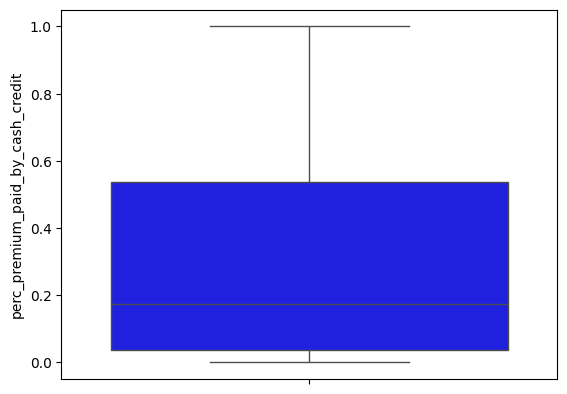

In [18]:
sns.boxplot(df['perc_premium_paid_by_cash_credit'],color='blue')
plt.show()

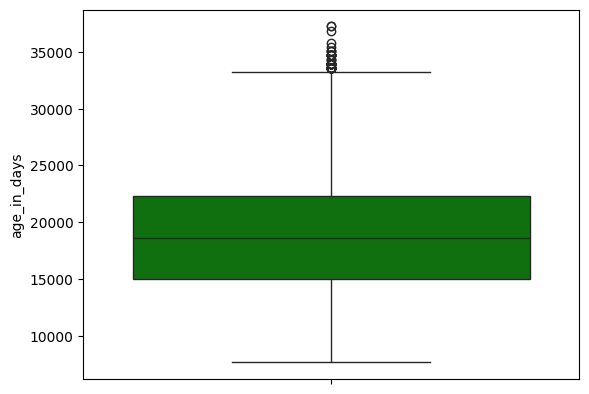

In [19]:
sns.boxplot(df['age_in_days'],color='green')
plt.show()

**Key Observations from the Age Distribution Plot**

1. **Minimum Age:**  
    - The youngest customer in the dataset is **less than 10,000 days** old.  
    - This is approximately **27 years** old (`10,000 / 365 ≈ 27.4 years`).  

2. **1st Quartile (Q1):**  
    - **25% of the customers** are **younger than 15,000 days**.  
    - This is approximately **41 years** old (`15,000 / 365 ≈ 41.1 years`).  

3. **Median Age (Q2):**  
    - The **median age** is **less than 20,000 days**.  
    - This is approximately **54 years** old (`20,000 / 365 ≈ 54.8 years`).  
    - Since the **median is close to the mean**, the age distribution appears to be approximately **symmetrical**.  

4. **3rd Quartile (Q3):**  
    - **75% of the customers** are **younger than 22,500 days**.  
    - This is approximately **61.6 years** old (`22,500 / 365 ≈ 61.6 years`).  

5. **Maximum Age:**  
    - The **oldest customer** is **more than 35,000 days** old.  
    - This is approximately **95.9 years** old (`35,000 / 365 ≈ 95.9 years`).  

---

- The **age distribution** covers a wide range, from young adults (27 years) to senior citizens (96 years).  
- Most customers fall within the **41 to 62 years** range (between Q1 and Q3).  
- The presence of older customers suggests that the insurance policies cater to a **diverse age group**.  


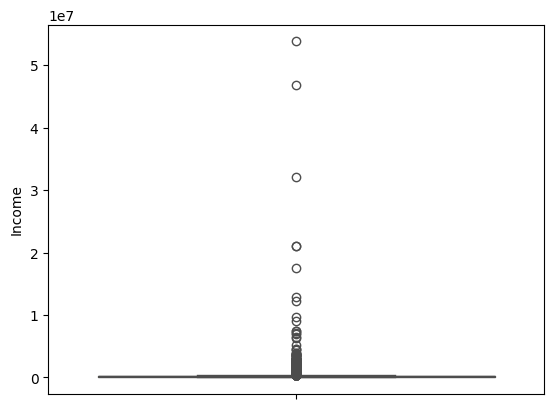

In [20]:
sns.boxplot(df['Income'],color='yellow')
plt.show()

**Key Observations from the Income Boxplot**

1. **Majority of Customers:**  
    - The **majority of customers** have a monthly income of **less than ₹1 × 10⁷ (1 crore)**.  
    - This is evident from the **upper whisker** of the boxplot, which is below ₹1 crore.  

2. **High-Income Outliers:**  
    - Two **outlier points** between **4 and 6** on the boxplot represent customers with:  
        - **Incomes below ₹5 crores**.  
        - **Incomes above ₹5 crores**.  

3. **Maximum Income:**  
    - The **highest income** in the dataset exceeds **₹8 crores** per month.  
    - This extreme value is represented by a **distant outlier point** on the boxplot.  

---

- The **majority of customers** earn below **₹1 crore** per month.  
- The **high-income outliers** represent a small group of customers earning **between ₹4 crores and ₹8 crores**, making them **exceptionally high earners**.  
- These **outliers could potentially skew the model** and may require **scaling or transformation** during data preprocessing.  


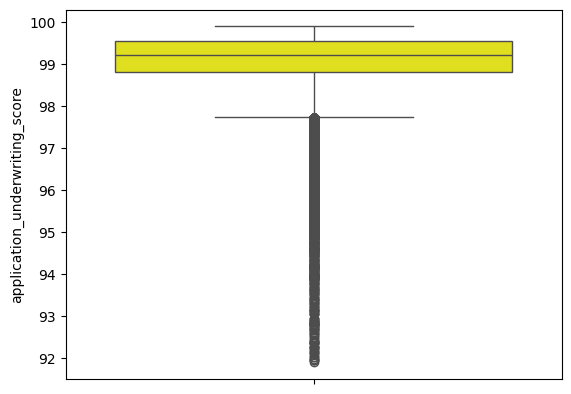

In [21]:
sns.boxplot(df['application_underwriting_score'],color='yellow')
plt.show()

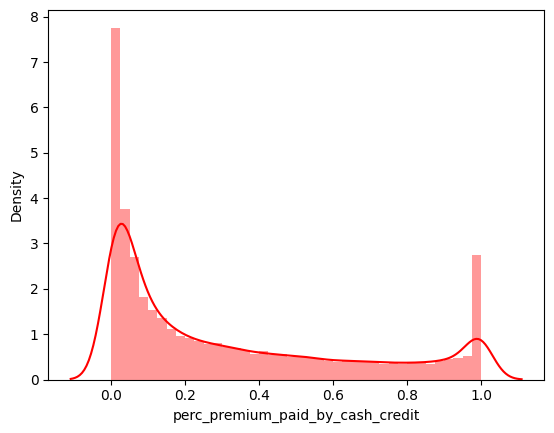

In [22]:
sns.distplot(df['perc_premium_paid_by_cash_credit'],color='red')
plt.show()

**Key Observations from the Distribution Plot**

1. **Distribution Shape:**  
    - The distribution is **right-skewed**.  
    - However, it also shows a **slight bimodal pattern** with a **small peak at the extreme right**.  
    - This indicates the presence of **two groups** of customers:  
        - One group that pays a **very small percentage** of the premium by cash/credit.  
        - Another group that pays **almost entirely by cash/credit**.  

2. **Mode of the Distribution:**  
    - The **mode** (most frequent value) is near `0`.  
    - This indicates that **most customers** pay **very little** of their premium by cash or credit card.  

3. **Small Peak at the Extreme Right:**  
    - A **small peak** near `1` represents customers who pay **100% of their premium** by cash or credit.  
    - These customers are the **minority** in the dataset.  

---

- The **majority of customers** pay a **small percentage** of their premium by cash/credit (near `0`).  
- A **small group** of customers pays **100% of their premium** by cash/credit.  
- The **bimodal distribution** suggests two distinct customer behaviors:
    - **Low cash/credit payers** (majority).  
    - **Full cash/credit payers** (minority).  


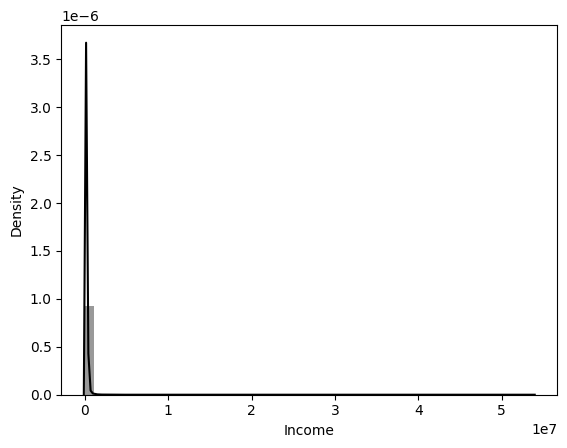

In [23]:
# Checking the 'income' distribution:
sns.distplot(df['Income'],color='black')
plt.show()

**Key Observations from the Distribution Plot**

1. **Distribution Shape:**  
    - The distribution of `Income` is **extremely right-skewed**.  
    - Most customers have a **lower income**, while a **small group of customers** has **exceptionally high income**, creating a **long right tail**.  

2. **Implication of Right-Skewness:**  
    - The **skewness** can **distort the model's performance** by giving more influence to the high-income outliers.  
    - It can also lead to **non-linear relationships** between `Income` and the target variable.  

3. **Solution – Variable Transformation:**  
    - To make the distribution **more symmetrical**, apply a **variable transformation**.  
    - Common transformations include:  
        -  **Log Transformation:**  
        -  **Square Root Transformation:**  
        -  **Box-Cox Transformation** (for advanced analysis):  
---

- The `Income` variable is **highly right-skewed**, which could negatively impact the model’s performance.  
- Applying **log transformation** or **Box-Cox transformation** will:  
    - **Reduce skewness**.  
    - **Stabilize variance**.  
    - Improve the **model's interpretability and accuracy**.  


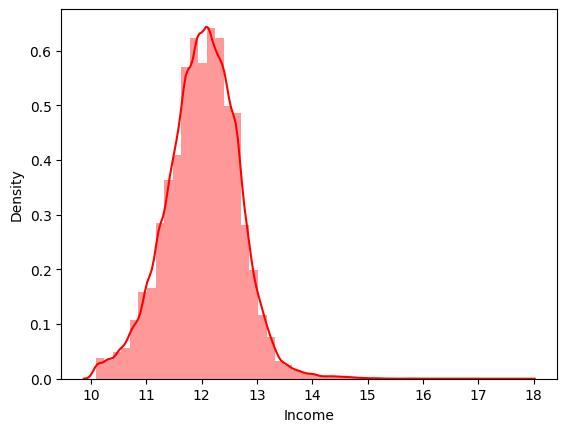

In [24]:
sns.distplot(np.log(df["Income"]),color='red')
plt.show()

In [25]:
np.log(df['Income']).mode()

,Income
0,11.919257


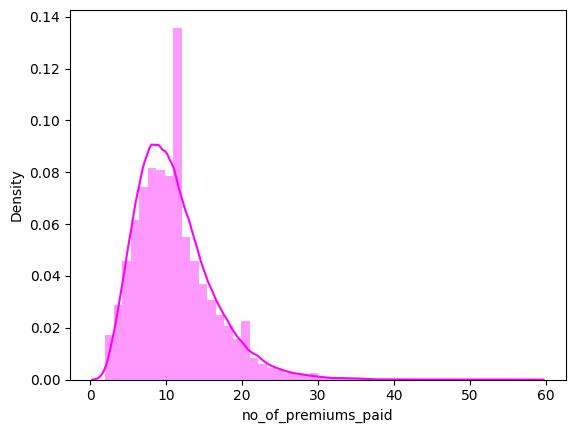

In [26]:
sns.distplot(df['no_of_premiums_paid'],color='magenta')
plt.show()

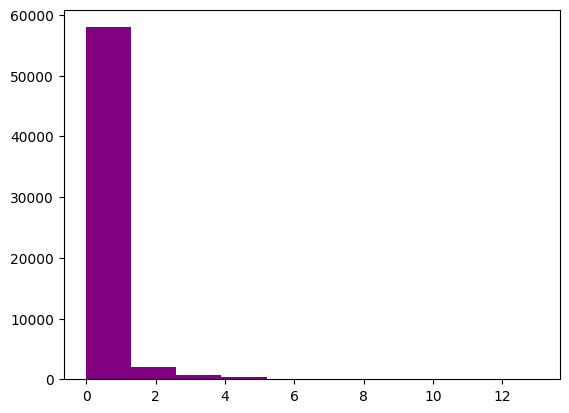

In [27]:
plt.hist(df['Count_3-6_months_late'],histtype='stepfilled',label=str,color='purple',bins=10)
plt.show()

In [28]:
df['Count_3-6_months_late'].value_counts()

,count
Count_3-6_months_late,
0.0,51037
1.0,6918
2.0,1993
3.0,770
4.0,302
5.0,141
6.0,55
7.0,17
8.0,12


In [29]:
df['Count_6-12_months_late'].value_counts()

,count
Count_6-12_months_late,
0.0,58278
1.0,2020
2.0,522
3.0,254
4.0,107
5.0,29
6.0,18
7.0,8
10.0,4


In [30]:
df['Count_more_than_12_months_late'].value_counts()

,count
Count_more_than_12_months_late,
0.0,58330
1.0,2344
2.0,399
3.0,120
4.0,38
5.0,11
6.0,4
7.0,3
8.0,2


**Key Observations**
1. **Majority of Customers:**  
    - **76,135** customers (**95.4%**) have **0 late premiums** beyond **12 months**.  
    - This indicates that the **majority of policyholders** pay their premiums on time or have delays of less than **12 months**.  

2. **Late Payment Distribution:**  
    - **2,996** customers (**3.75%**) have been **1 month late** beyond the **12-month threshold**.  
    - **498 customers** (**0.62%**) have been **2 months late**.  
    - **151 customers** (**0.19%**) have been **3 months late**.  
    - **Only a few customers** have more than **3 months late payments** beyond **12 months**.  
    - There is **one extreme case** with **11 months late** payment.  

3. **Skewed Distribution:**  
    - The distribution is **highly skewed** towards `0` (no late payments beyond 12 months).  
    - Very few customers exhibit **multiple late payments** beyond 12 months.  

---

- The **majority of customers** have **no late payments** beyond 12 months.  
- Only a **small fraction of customers** have late payments extending beyond **1-3 months**.  
- The presence of **rare extreme cases** (up to **11 months late**) indicates potential **outliers** that may need special attention or handling during model building.  


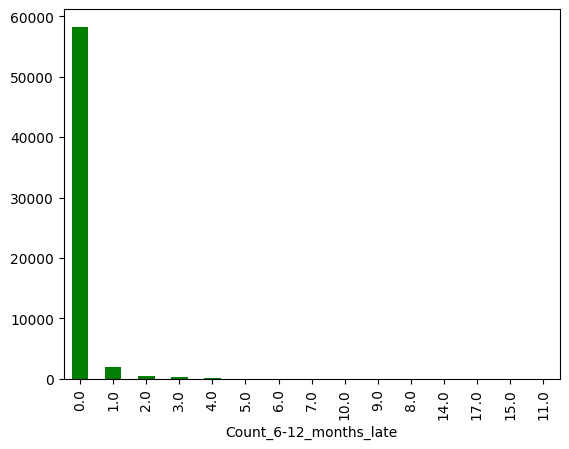

In [31]:
df['Count_6-12_months_late'].value_counts().plot.bar(color='green')
plt.show()

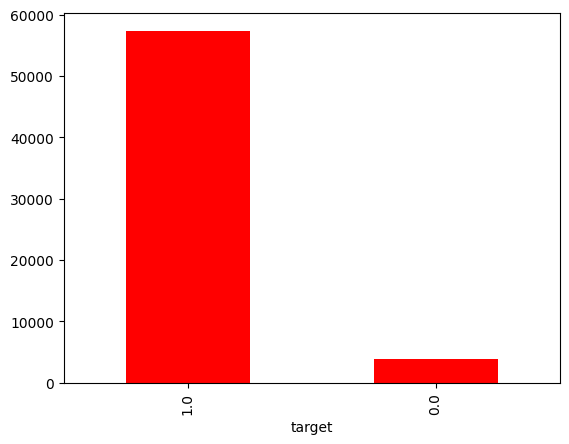

In [32]:
df['target'].value_counts().plot.bar(color='red')
plt.show()

In [33]:
df['target'].value_counts()

,count
target,
1.0,57406
0.0,3846


**Distribution of `target` Variable**
**Key Observations**
**Class Imbalance:**  
    - The dataset is **highly imbalanced** towards `target = 1`.  
    - **Class distribution ratio:**  
        - `1` (paid on time): **93.7%**  
        - `0` (not paid on time): **6.3%**  
    - This imbalance could lead to:  
        - The model **favoring the majority class**.  
        - Poor prediction performance on the **minority class** (non-payers).  

---

**Handling Class Imbalance**
- **Resampling Techniques:**  
    - **Oversampling the minority class** → Use **SMOTE (Synthetic Minority Over-sampling Technique)** to create synthetic samples of the minority class.  
    - **Undersampling the majority class** → Randomly reduce the samples from the majority class.  
- **Class-weight adjustment:**  
    - Assign higher weights to the **minority class** during model training to balance the influence of both classes.  
- **Evaluation with appropriate metrics:**  
    - Use **precision, recall, F1-score**, and **AUC-ROC** rather than accuracy, as accuracy can be misleading in imbalanced datasets.  


In [34]:
# Creating the total late premium column
df['late_premium'] = (df['Count_3-6_months_late'] + df['Count_6-12_months_late'] + df['Count_more_than_12_months_late'])

<Axes: xlabel='late_premium', ylabel='count'>

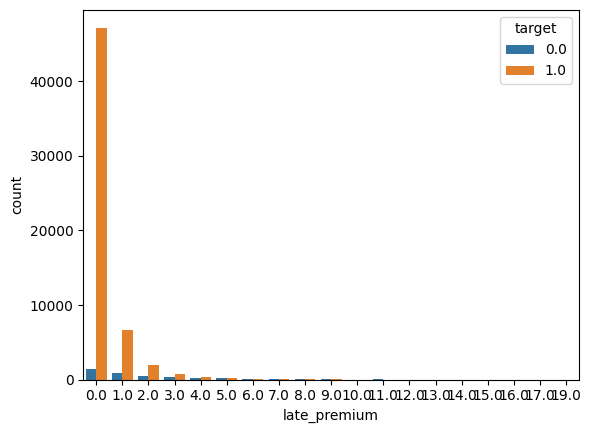

In [35]:
sns.countplot(x = 'late_premium', data = df, hue = 'target')

<Axes: xlabel='late_premium'>

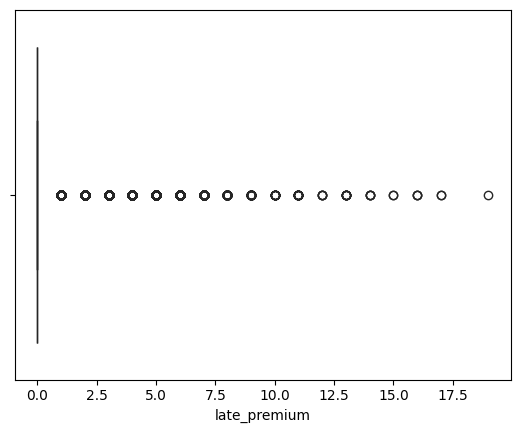

In [36]:
sns.boxplot(x=df['late_premium'], color='green')

In [37]:
df['late_premium'].value_counts()

,count
late_premium,
0.0,48585
1.0,7470
2.0,2485
3.0,1177
4.0,630
5.0,388
6.0,222
7.0,130
8.0,70


In [38]:
# Grouping late premiums greater than or equal to 10 into '10+'
df['late_premium'] = df['late_premium'].apply(lambda x: '10+' if x >= 10 else str(int(x)))

In [39]:
df.describe()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,61252.000000,61252.000000,6.125200e+04,61252.000000,61252.000000,61252.000000,61252.000000,61252.000000,61252.000000
mean,0.315378,18804.504865,2.095435e+05,0.257053,0.077287,0.061729,99.067057,11.055998,0.937210
std,0.330220,5105.063641,4.016736e+05,0.705514,0.432325,0.318402,0.741352,5.112133,0.242586
min,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,0.038000,14975.000000,1.100500e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,0.174000,18624.000000,1.685500e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,0.536000,22279.000000,2.546225e+05,0.000000,0.000000,0.000000,99.530000,14.000000,1.000000
max,1.000000,37240.000000,5.382190e+07,13.000000,17.000000,11.000000,99.890000,58.000000,1.000000


# Continuous-Continuous Analysis

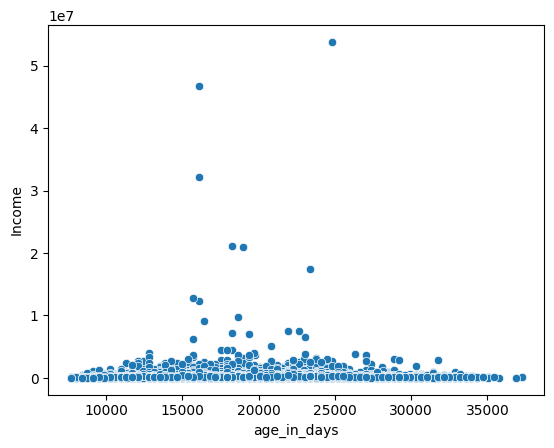

In [40]:
sns.scatterplot(x='age_in_days', y='Income', data=df)
plt.show()


- The points appear **scattered randomly** across the plot, indicating **no clear linear correlation** between `age_in_days` and `Income`.
- Regardless of age, customers have **similar income ranges**.
- The customers' **age ranges from ~7,670 days (~21 years)** to **37,240 days (~102 years)**.
- The **distribution appears uniform**, indicating a good spread of customers across different age groups.
- The majority of the points are concentrated between: **₹1 lakh** and **₹2.5 lakhs**
- This indicates that **most customers** have moderate income levels, regardless of their age.

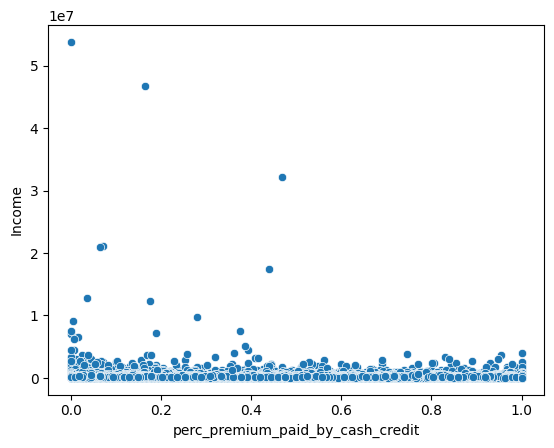

In [41]:
sns.scatterplot(x='perc_premium_paid_by_cash_credit', y='Income', data=df)
plt.show()

- The points are **evenly scattered** across the entire range, indicating **no clear correlation** between `perc_premium_paid_by_cash_credit` and `Income`.
- Customers with **low, moderate, and high income** have a similar range of premium payment percentages.
- The scatterplot shows a **dense concentration of points at `0%`**, indicating that **many customers pay no premium** via cash or credit card.
- This suggests that the majority of payments might be made via **other payment methods** (e.g., auto-debit, bank transfer).
- The income range is **uniformly spread** across different percentages of premium paid by cash/credit.
- This indicates that **income does not influence** the mode of payment significantly.
- There is a **slight increase in density** near `100%`, indicating that some customers **consistently pay their premiums fully** using cash/credit.

# Categorical-Continuous Analysis

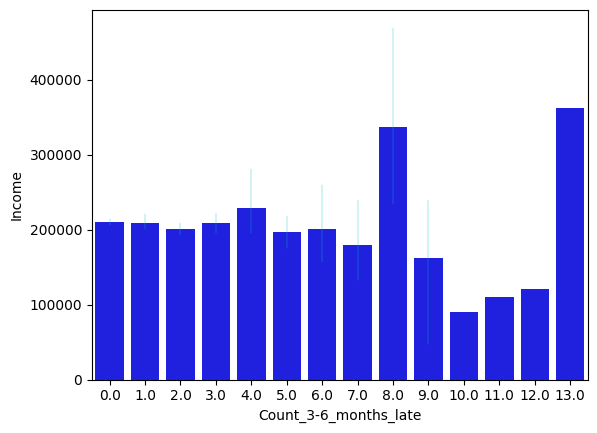

In [42]:
sns.barplot(x='Count_3-6_months_late', y='Income', data=df, color='b', errcolor='c', errwidth=0.26)
plt.show()

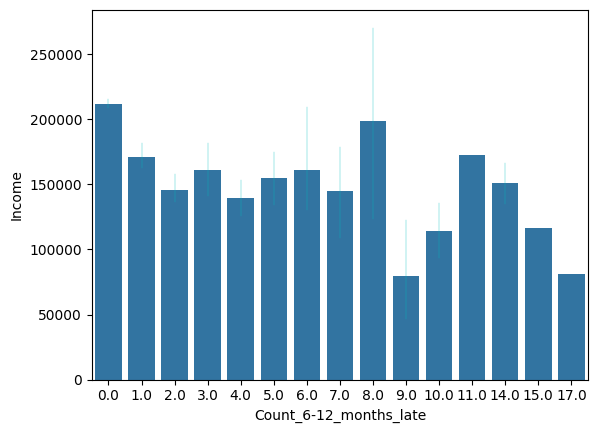

In [43]:
sns.barplot(x='Count_6-12_months_late', y='Income', data=df, errcolor='c', errwidth=0.26)
plt.show()

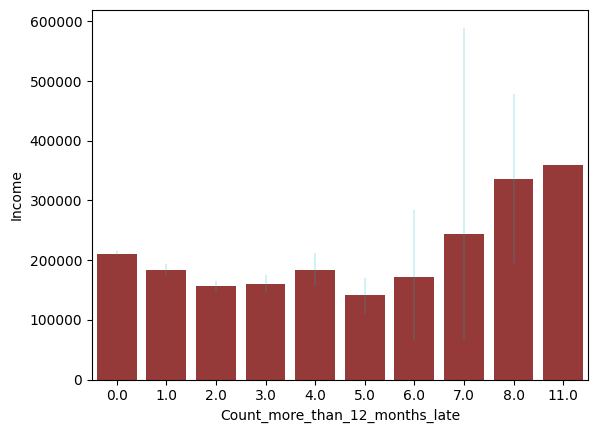

In [44]:
sns.barplot(x='Count_more_than_12_months_late', y='Income', data=df, color='brown', errcolor='c', errwidth=0.26)
plt.show()

One thing is clear from above 3 plots though that the customers who earn more than Rs 4 lakh a month have been paying their premiums on time. So the insurance company should not be worried atleast about all the rich customers as they seem to be sticking around with the company in near future.

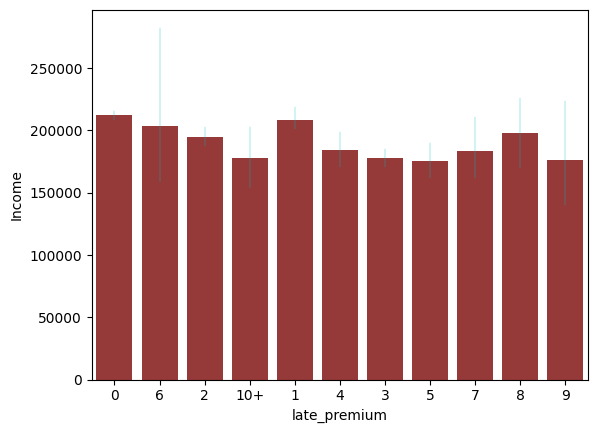

In [45]:
sns.barplot(x='late_premium', y='Income', data=df, color='brown', errcolor='c', errwidth=0.26)
plt.show()

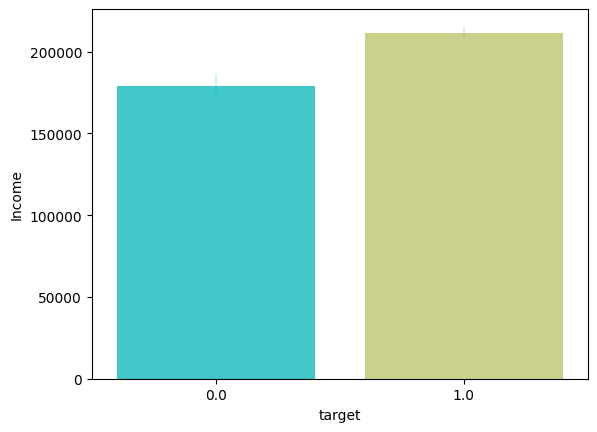

In [46]:
sns.barplot(x='target', y='Income', data=df, palette='rainbow', errcolor='c', errwidth=0.26)
plt.show()

This shows that the customers who earn under Rs 1,80,000 a month are the ones the insurance company should be worried about. As they are the ones who did not pay their premiums on time.

# Categorical-Categorical Analysis

In [47]:
pd.crosstab(df['target'],df['residence_area_type'])

residence_area_type,Rural,Urban
target,,
0.0,1532,2314
1.0,22784,34622


This **two-way table** is displaying the following:

1. The Rural column is showing that there are 1,998 rural customers of the insurance company who didn't pay their premiums on time. Whereas 29,672 rural customers paid their premiums on time.
2. The urban column is showing that there are 3,000 urban customers who didn't pay their premiums on time. On the other hand, there are 45,183 urban customers of the insurance company who paid their premium on time.

In [48]:
pd.crosstab(df['residence_area_type'],df['sourcing_channel'])

sourcing_channel,A,B,C,D,E
residence_area_type,,,,,
Rural,12973,5002,3762,2356,223
Urban,19609,7762,5711,3575,279


In [49]:
df['sourcing_channel'].value_counts()/len(df['sourcing_channel'])

,count
sourcing_channel,
A,0.531934
B,0.208385
C,0.154656
D,0.096829
E,0.008196


So 52% of total customers prefer channel A, 20.67% customers prefer channel B, 15% customers prefer channel C, and so on. Clearly A is the most preferred channel whereas E is the least preferred channel among the customers.

In [50]:
df['residence_area_type'].value_counts()

,count
residence_area_type,
Urban,36936
Rural,24316


In [51]:
df['residence_area_type'].value_counts() / len(df['residence_area_type'])

,count
residence_area_type,
Urban,0.603017
Rural,0.396983


So 60.35% of all customers are urban & 39.64% of them are rural.

In [52]:
pd.crosstab(df['no_of_premiums_paid'],df['residence_area_type'])

residence_area_type,Rural,Urban
no_of_premiums_paid,,
2.0,76,126
3.0,384,605
4.0,821,1162
5.0,1279,1867
6.0,1647,2580
7.0,2033,3058
8.0,2325,3288
9.0,2199,3341
10.0,2112,3273


In [53]:
pd.crosstab(df['residence_area_type'],df['Count_3-6_months_late'])

Count_3-6_months_late,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
residence_area_type,,,,,,,,,,,,,,
Rural,20298,2690,785,333,123,50,20,5,7,3,1,0,1,0
Urban,30739,4228,1208,437,179,91,35,12,5,0,0,1,0,1


In [54]:
pd.crosstab(df['residence_area_type'],df['Count_6-12_months_late'])

Count_6-12_months_late,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,14.0,15.0,17.0
residence_area_type,,,,,,,,,,,,,,,
Rural,23080,845,217,102,47,8,9,3,2,1,1,0,1,0,0
Urban,35198,1175,305,152,60,21,9,5,1,3,3,1,1,1,1


In [55]:
pd.crosstab(df['residence_area_type'],df['Count_more_than_12_months_late'])

Count_more_than_12_months_late,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,11.0
residence_area_type,,,,,,,,,,
Rural,23128,946,183,43,11,3,1,0,1,0
Urban,35202,1398,216,77,27,8,3,3,1,1


In [56]:
pd.crosstab(df['residence_area_type'],df['late_premium'])

late_premium,0,1,10+,2,3,4,5,6,7,8,9
residence_area_type,,,,,,,,,,,
Rural,19320,2884,20,979,507,262,171,85,40,27,21
Urban,29265,4586,35,1506,670,368,217,137,90,43,19


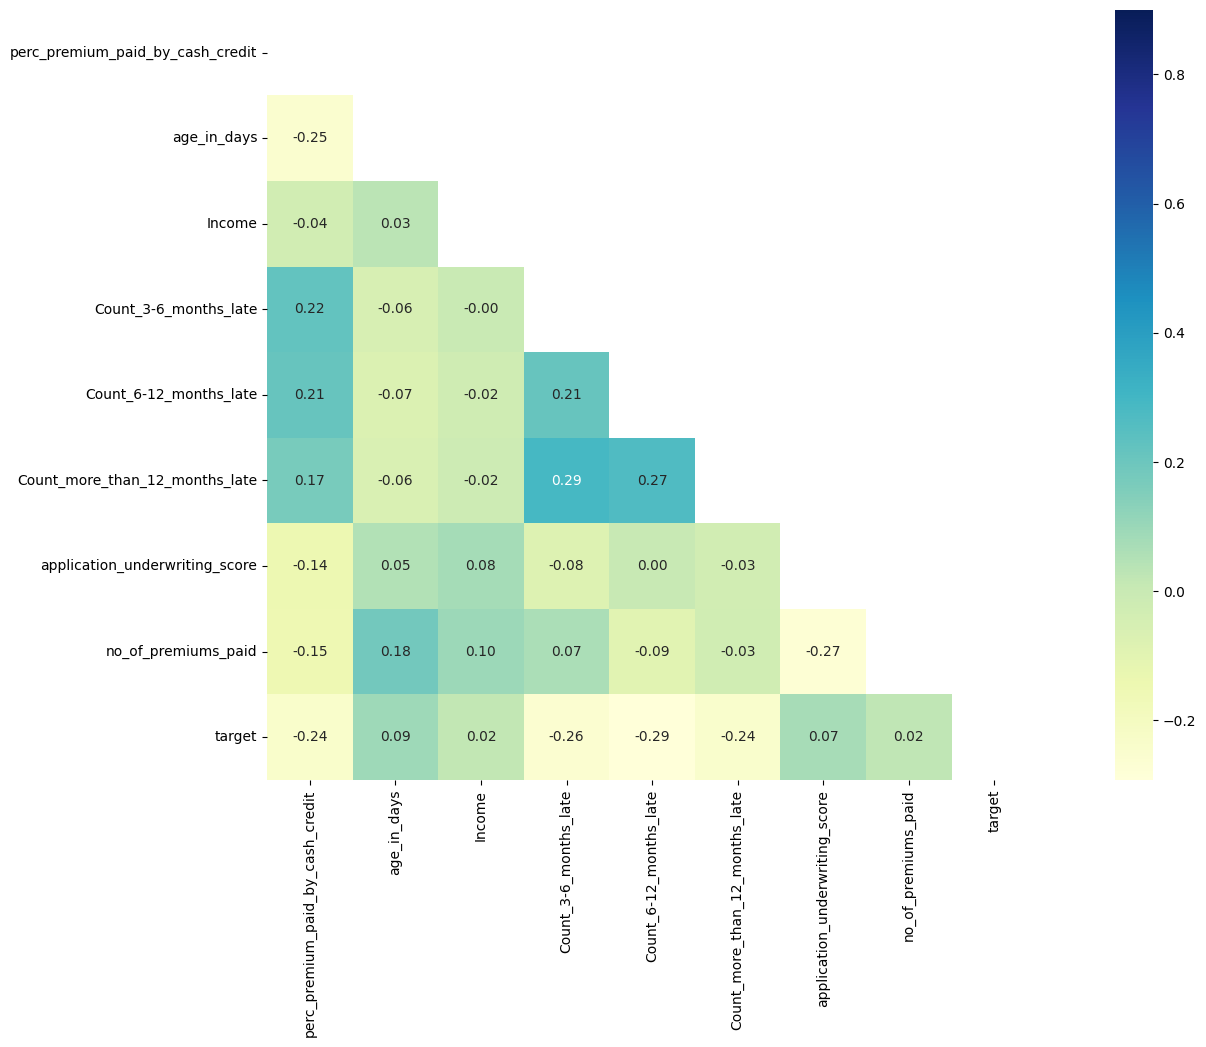

In [57]:
# Select only numerical columns
num_df = df.select_dtypes(include='number')

# Calculate correlation matrix
corr = num_df.corr()

# Create mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plotting
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True, cmap='YlGnBu', fmt=".2f")
plt.show()


# Variable Transformation

In [58]:
#--> CONVERTING AGE IN DAYS TO YEARS AND DROPPING PREVIOUS ONE
df['age'] = df['age_in_days']//365
df.drop(['age_in_days'], axis = 1, inplace = True)
df.head()

,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,late_premium,age
0,0.429,355060,0.0,0.0,0.0,99.02,13.0,C,Urban,1.0,0,33
1,0.010,315150,0.0,0.0,0.0,99.89,21.0,A,Urban,1.0,0,59
2,0.917,84140,2.0,3.0,1.0,98.69,7.0,C,Rural,0.0,6,48
3,0.049,250510,0.0,0.0,0.0,99.57,9.0,A,Urban,1.0,0,42
4,0.052,198680,0.0,0.0,0.0,99.87,12.0,B,Urban,1.0,0,86


In [59]:
#GROUPING SOURCING CHANNEL
df[['sourcing_channel', 'target']].groupby('sourcing_channel', as_index = False).mean()

,sourcing_channel,target
0,A,0.944693
1,B,0.936305
2,C,0.926739
3,D,0.915529
4,E,0.928287


In [60]:
#grouping of mean und_score based on the ageclass
df[['age', 'application_underwriting_score']].groupby('age').mean()

,application_underwriting_score
age,
21,99.721250
22,99.669153
23,99.637471
24,99.428148
25,99.411777
...,...
96,99.866667
97,99.440000
98,98.440000


In [61]:
print(df['application_underwriting_score'].mean())
print(df['application_underwriting_score'].std())

99.06705740220727
0.7413519456519072


In [62]:
print(df[df['sourcing_channel'] == 'A']['application_underwriting_score'].std())

0.7742330732297457


In [63]:
#grouping the sourcing channel
df[['sourcing_channel', 'target']].groupby('sourcing_channel', as_index = False).mean()

,sourcing_channel,target
0,A,0.944693
1,B,0.936305
2,C,0.926739
3,D,0.915529
4,E,0.928287


In [64]:
df[['sourcing_channel', 'application_underwriting_score']].groupby('sourcing_channel', as_index = False).mean()

,sourcing_channel,application_underwriting_score
0,A,99.100623
1,B,99.058626
2,C,98.979868
3,D,99.039201
4,E,99.077331


In [65]:
df[['residence_area_type', 'application_underwriting_score']].groupby('residence_area_type', as_index = False).mean()

,residence_area_type,application_underwriting_score
0,Rural,99.062483
1,Urban,99.070069


In [66]:
df['late_premium'] = df['late_premium'].replace('10+', 10).astype(int)

In [67]:
df

,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,late_premium,age
0,0.429,355060,0.0,0.0,0.0,99.02,13.0,C,Urban,1.0,0,33
1,0.010,315150,0.0,0.0,0.0,99.89,21.0,A,Urban,1.0,0,59
2,0.917,84140,2.0,3.0,1.0,98.69,7.0,C,Rural,0.0,6,48
3,0.049,250510,0.0,0.0,0.0,99.57,9.0,A,Urban,1.0,0,42
4,0.052,198680,0.0,0.0,0.0,99.87,12.0,B,Urban,1.0,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...
63646,0.309,246130,0.0,0.0,0.0,99.67,9.0,C,Urban,1.0,0,69
63647,0.804,87550,1.0,0.0,0.0,99.06,18.0,B,Urban,1.0,1,56
63648,1.000,61570,0.0,0.0,0.0,99.64,3.0,A,Rural,1.0,0,25
63649,0.918,210050,1.0,0.0,0.0,98.64,13.0,B,Urban,1.0,1,71


In [68]:
df.columns

Index(['perc_premium_paid_by_cash_credit', 'Income', 'Count_3-6_months_late',
       'Count_6-12_months_late', 'Count_more_than_12_months_late',
       'application_underwriting_score', 'no_of_premiums_paid',
       'sourcing_channel', 'residence_area_type', 'target', 'late_premium',
       'age'],
      dtype='object')